In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.linear_model import Lasso
from scipy.io import loadmat
from sklearn.metrics import mean_squared_error
from scipy.integrate import solve_ivp
import os

import pysindy as ps

# Ignore matplotlib deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Seed the random number generators for reproducibility
np.random.seed(100)

integrator_keywords = {}
integrator_keywords['rtol'] = 1e-12
integrator_keywords['method'] = 'LSODA'
integrator_keywords['atol'] = 1e-12

pysindy_path = r'C:\Users\phili\PycharmProjects\pysindy'

In [2]:
# basic data to illustrate the PDE Library
t = np.linspace(0, 10)
x = np.linspace(0, 10)
u = np.ones((len(x) * len(t), 2))

In [3]:
# basic data to illustrate the PDE Library
t = np.linspace(0, 10)
x = np.linspace(0, 10)
u = np.ones((len(x) * len(t), 2))

# Define PDE library that is quadratic in u,
# and second-order in spatial derivatives of u.
library_functions = [lambda x: x, lambda x: x * x]
library_function_names = [lambda x: x, lambda x: x + x]
pde_lib = ps.PDELibrary(
    library_functions=library_functions,
    derivative_order=2,
    spatial_grid=x,
).fit(u)
pde_lib.transform(u)
print("2nd order derivative library: ")
print(pde_lib.get_feature_names())

# Define PDE library that is quadratic in u, and
# second-order in spatial derivatives of u.
library_functions = [lambda x: x, lambda x: x * x]
library_function_names = [lambda x: x, lambda x: x + x]
pde_lib = ps.PDELibrary(
    library_functions=library_functions,
    function_names=library_function_names,
    derivative_order=2,
    spatial_grid=x,
).fit(u)
pde_lib.transform(u)
print("2nd order derivative library with function names: ")
print(pde_lib.get_feature_names(), "\n")

# Now put in a bias term and try 4th order derivatives
pde_lib = ps.PDELibrary(
    library_functions=library_functions,
    function_names=library_function_names,
    derivative_order=4,
    spatial_grid=x,
    include_bias=True,
).fit(u)
pde_lib.transform(u)
print("4th order derivative library: ")
print(pde_lib.get_feature_names(), "\n")

# Default is that mixed derivative/non-derivative terms are returned
# but we change that behavior with include_interaction=False
pde_lib = ps.PDELibrary(
    library_functions=library_functions,
    function_names=library_function_names,
    derivative_order=4,
    spatial_grid=x,
    include_bias=True,
    include_interaction=False,
).fit(u)
pde_lib.transform(u)
print("4th order derivative library, no mixed terms: ")
print(pde_lib.get_feature_names())

2nd order derivative library: 
['f0(x0)', 'f0(x1)', 'f1(x0)', 'f1(x1)', 'x0_1', 'x1_1', 'x0_11', 'x1_11', 'f0(x0)x0_1', 'f0(x0)x1_1', 'f0(x1)x0_1', 'f0(x1)x1_1', 'f1(x0)x0_1', 'f1(x0)x1_1', 'f1(x1)x0_1', 'f1(x1)x1_1', 'f0(x0)x0_11', 'f0(x0)x1_11', 'f0(x1)x0_11', 'f0(x1)x1_11', 'f1(x0)x0_11', 'f1(x0)x1_11', 'f1(x1)x0_11', 'f1(x1)x1_11']
2nd order derivative library with function names: 
['x0', 'x1', 'x0x0', 'x1x1', 'x0_1', 'x1_1', 'x0_11', 'x1_11', 'x0x0_1', 'x0x1_1', 'x1x0_1', 'x1x1_1', 'x0x0x0_1', 'x0x0x1_1', 'x1x1x0_1', 'x1x1x1_1', 'x0x0_11', 'x0x1_11', 'x1x0_11', 'x1x1_11', 'x0x0x0_11', 'x0x0x1_11', 'x1x1x0_11', 'x1x1x1_11'] 

4th order derivative library: 
['1', 'x0', 'x1', 'x0x0', 'x1x1', 'x0_1', 'x1_1', 'x0_11', 'x1_11', 'x0_111', 'x1_111', 'x0_1111', 'x1_1111', 'x0x0_1', 'x0x1_1', 'x1x0_1', 'x1x1_1', 'x0x0x0_1', 'x0x0x1_1', 'x1x1x0_1', 'x1x1x1_1', 'x0x0_11', 'x0x1_11', 'x1x0_11', 'x1x1_11', 'x0x0x0_11', 'x0x0x1_11', 'x1x1x0_11', 'x1x1x1_11', 'x0x0_111', 'x0x1_111', 'x1x0_111', '

In [28]:
t.shape, x.shape, u.shape

((201,), (512,), (512, 201))

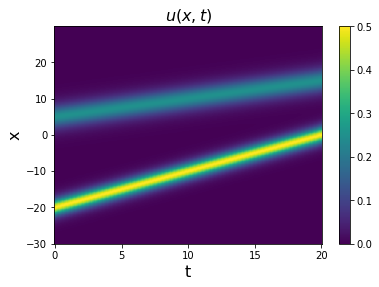

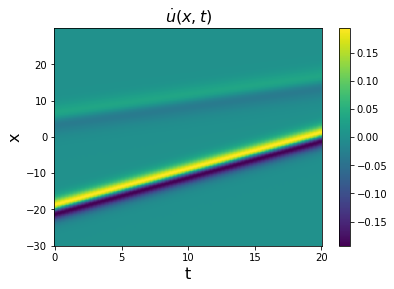

In [25]:
# Load the data stored in a matlab .mat file
kdV = loadmat(os.path.join(pysindy_path, 'examples/data/kdv.mat'))
t = np.ravel(kdV['t'])
x = np.ravel(kdV['x'])
u = np.real(kdV['usol'])

dt = t[1] - t[0]
dx = x[1] - x[0]

# Plot u and u_dot
plt.figure()
plt.pcolormesh(t, x, u)
plt.xlabel('t', fontsize=16)
plt.ylabel('x', fontsize=16)
plt.title(r'$u(x, t)$', fontsize=16)
plt.colorbar()
plt.figure()

u_dot = ps.FiniteDifference(axis=1)._differentiate(u, t=dt)

plt.pcolormesh(t, x, u_dot)
plt.xlabel('t', fontsize=16)
plt.ylabel('x', fontsize=16)
plt.title(r'$\dot{u}(x, t)$', fontsize=16)

plt.colorbar()
plt.show()

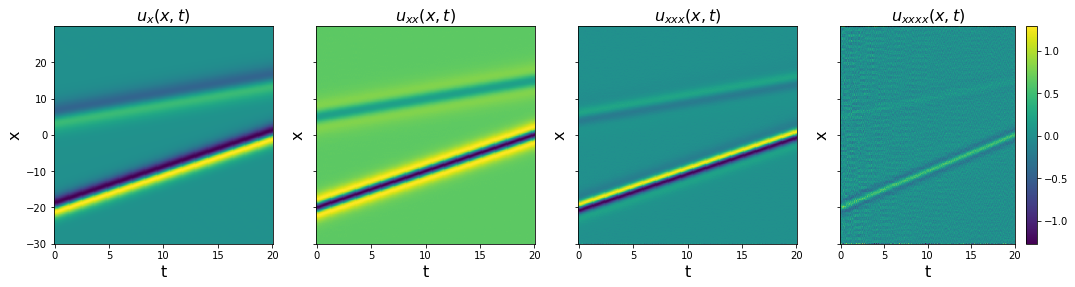

In [5]:
dx = x[1] - x[0]
ux = ps.FiniteDifference(d=1, axis=0,
                         drop_endpoints=False)._differentiate(u, dx)
uxx = ps.FiniteDifference(d=2, axis=0,
                          drop_endpoints=False)._differentiate(u, dx)
uxxx = ps.FiniteDifference(d=3, axis=0,
                           drop_endpoints=False)._differentiate(u, dx)
uxxxx = ps.FiniteDifference(d=4, axis=0,
                            drop_endpoints=False)._differentiate(u, dx)

# Plot derivative results
plt.figure(figsize=(18, 4))
plt.subplot(1, 4, 1)
plt.pcolormesh(t, x, ux)
plt.xlabel('t', fontsize=16)
plt.ylabel('x', fontsize=16)
plt.title(r'$u_x(x, t)$', fontsize=16)
plt.subplot(1, 4, 2)
plt.pcolormesh(t, x, uxx)
plt.xlabel('t', fontsize=16)
plt.ylabel('x', fontsize=16)
ax = plt.gca()
ax.set_yticklabels([])
plt.title(r'$u_{xx}(x, t)$', fontsize=16)
plt.subplot(1, 4, 3)
plt.pcolormesh(t, x, uxxx)
plt.xlabel('t', fontsize=16)
plt.ylabel('x', fontsize=16)
ax = plt.gca()
ax.set_yticklabels([])
plt.title(r'$u_{xxx}(x, t)$', fontsize=16)
plt.subplot(1, 4, 4)
plt.pcolormesh(t, x, uxxxx)
plt.xlabel('t', fontsize=16)
plt.ylabel('x', fontsize=16)
ax = plt.gca()
ax.set_yticklabels([])
plt.title(r'$u_{xxxx}(x, t)$', fontsize=16)
plt.colorbar()
plt.show()

In [6]:
u = u.reshape(len(x), len(t), 1)

# Define PDE library that is quadratic in u, and
# third-order in spatial derivatives of u.
library_functions = [lambda x: x, lambda x: x * x]
library_function_names = [lambda x: x, lambda x: x + x]
pde_lib = ps.PDELibrary(library_functions=library_functions,
                        function_names=library_function_names,
                        derivative_order=3, spatial_grid=x,
                        include_bias=True, is_uniform=True)

# Fit the model with different optimizers.
# Using normalize_columns = True to improve performance.
print('STLSQ model: ')
optimizer = ps.STLSQ(threshold=5, alpha=1e-5, normalize_columns=True)
model = ps.SINDy(feature_library=pde_lib, optimizer=optimizer)
model.fit(u, t=dt)
model.print()

print('SR3 model, L0 norm: ')
optimizer = ps.SR3(threshold=7, max_iter=10000, tol=1e-15, nu=1e2,
                   thresholder='l0', normalize_columns=True)
model = ps.SINDy(feature_library=pde_lib, optimizer=optimizer)
model.fit(u, t=dt)
model.print()

print('SR3 model, L1 norm: ')
optimizer = ps.SR3(threshold=0.05, max_iter=10000, tol=1e-15,
                   thresholder='l1', normalize_columns=True)
model = ps.SINDy(feature_library=pde_lib, optimizer=optimizer)
model.fit(u, t=dt)
model.print()

print('SSR model: ')
optimizer = ps.SSR(normalize_columns=True, kappa=5e-3)
model = ps.SINDy(feature_library=pde_lib, optimizer=optimizer)
model.fit(u, t=dt)
model.print()

print('SSR (metric = model residual) model: ')
optimizer = ps.SSR(criteria='model_residual', normalize_columns=True, kappa=5e-3)
model = ps.SINDy(feature_library=pde_lib, optimizer=optimizer)
model.fit(u, t=dt)
model.print()

print('FROLs model: ')
optimizer = ps.FROLS(normalize_columns=True, kappa=1e-5)
model = ps.SINDy(feature_library=pde_lib, optimizer=optimizer)
model.fit(u, t=dt)
model.print()

STLSQ model: 
(x0)' = -0.992 x0_111 + -5.967 x0x0_1
SR3 model, L0 norm: 
(x0)' = -0.992 x0_111 + -5.967 x0x0_1
SR3 model, L1 norm: 
(x0)' = -0.069 x0_1 + -0.921 x0_111 + -5.540 x0x0_1
SSR model: 
(x0)' = -0.054 x0_1 + -0.918 x0_111 + -5.681 x0x0_1 + 0.290 x0x0x0_11
SSR (metric = model residual) model: 
(x0)' = -0.054 x0_1 + -0.918 x0_111 + -5.681 x0x0_1 + 0.290 x0x0x0_11
FROLs model: 
(x0)' = -0.069 x0_1 + -0.921 x0_111 + -5.540 x0x0_1
